In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [2]:
import pandas as pd
data = pd.read_excel("Data.xlsx", skiprows=1)
data.head()

,Stirringspeed,Temp,Time,Dosage,pH,Concentration,"Concentration,Cf(mg/L)",Adsorption capacity(mg/g),Adsorption efficiency(%)
0,60,30,60,0.02,2,50,40.48,23.8,19.040000
1,60,30,60,0.02,2,100,68.88,77.8,31.120000
2,60,30,60,0.02,2,250,239.28,26.8,4.288000
3,60,30,60,0.02,2,350,340.08,24.8,2.834286
4,60,30,60,0.02,2,500,467.28,81.8,6.544000


In [3]:
X = data[['Stirringspeed', 'Temp', 'Time', 'Dosage', 'pH', 'Concentration']]
y=data[['Concentration,Cf(mg/L)', 'Adsorption capacity(mg/g)', 'Adsorption efficiency(%)']]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)

In [6]:
X_pca.shape

(98112, 6)

In [7]:
X_pca

array([[-1.64647031e-01, -7.61330227e-14,  5.10495861e-02,
         2.55763468e+00, -1.30049861e+00, -6.73703141e-01],
       [-1.64647031e-01,  5.07709424e-13,  5.10495861e-02,
         2.55763468e+00, -1.14971616e+00, -6.73703141e-01],
       [-1.64647031e-01,  3.08685193e-13,  5.10495861e-02,
         2.55763468e+00, -6.97368818e-01, -6.73703141e-01],
       ...,
       [-1.20075270e+00, -4.74799550e-13,  4.00162754e+00,
        -1.33065765e-01,  8.10455653e-01,  1.15642826e+00],
       [-1.20075270e+00, -4.74418913e-13,  4.00162754e+00,
        -1.33065765e-01,  1.11202055e+00,  1.15642826e+00],
       [-1.20075270e+00, -4.73847956e-13,  4.00162754e+00,
        -1.33065765e-01,  1.56436789e+00,  1.15642826e+00]])

In [12]:
df_pca = pd.DataFrame(X_pca, columns=['pH', 'temp','Stirringspeed', 'Time', 'Concentration', 'Dosage'])
df_pca[['Concentration,Cf(mg/L)', 'Adsorption capacity(mg/g))', 'Adsorption efficiency(%)']]=y
df_pca.head()

,pH,temp,Stirringspeed,Time,Concentration,Dosage,"Concentration,Cf(mg/L)",Adsorption capacity(mg/g)),Adsorption efficiency(%)
0,-0.164647,-7.613302e-14,0.05105,2.557635,-1.300499,-0.673703,40.48,23.8,19.040000
1,-0.164647,5.077094e-13,0.05105,2.557635,-1.149716,-0.673703,68.88,77.8,31.120000
2,-0.164647,3.086852e-13,0.05105,2.557635,-0.697369,-0.673703,239.28,26.8,4.288000
3,-0.164647,-3.819787e-14,0.05105,2.557635,-0.395804,-0.673703,340.08,24.8,2.834286
4,-0.164647,-2.048997e-14,0.05105,2.557635,0.056543,-0.673703,467.28,81.8,6.544000


In [10]:
loadings_pca1 = pca.components_[0]
loadings_df = pd.DataFrame({'Feature': X.columns, 'PCA1 Loadings': loadings_pca1})
most_related_feature_to_pca1 = loadings_df.loc[loadings_df['PCA1 Loadings'].idxmax()]
print("Input feature most related to PCA1:")
print(most_related_feature_to_pca1)

loadings_pca2 = pca.components_[1]
loadings_df = pd.DataFrame({'Feature': X.columns, 'PCA2 Loadings': loadings_pca2})
most_related_feature_to_pca2 = loadings_df.loc[loadings_df['PCA2 Loadings'].idxmax()]
print("Input feature most related to PCA2:")
print(most_related_feature_to_pca2)

loadings_pca3 = pca.components_[2]
loadings_df = pd.DataFrame({'Feature': X.columns, 'PCA3 Loadings': loadings_pca3})
most_related_feature_to_pca3 = loadings_df.loc[loadings_df['PCA3 Loadings'].idxmax()]
print("Input feature most related to PCA3:")
print(most_related_feature_to_pca3)

loadings_pca4 = pca.components_[3]
loadings_df = pd.DataFrame({'Feature': X.columns, 'PCA4 Loadings': loadings_pca4})
most_related_feature_to_pca4 = loadings_df.loc[loadings_df['PCA4 Loadings'].idxmax()]
print("Input feature most related to PCA4:")
print(most_related_feature_to_pca4)

loadings_pca5 = pca.components_[4]
loadings_df = pd.DataFrame({'Feature': X.columns, 'PCA5 Loadings': loadings_pca5})
most_related_feature_to_pca5 = loadings_df.loc[loadings_df['PCA5 Loadings'].idxmax()]
print("Input feature most related to PCA5:")
print(most_related_feature_to_pca5)

loadings_pca6 = pca.components_[5]
loadings_df = pd.DataFrame({'Feature': X.columns, 'PCA6 Loadings': loadings_pca6})
most_related_feature_to_pca6 = loadings_df.loc[loadings_df['PCA6 Loadings'].idxmax()]
print("Input feature most related to PCA6:")
print(most_related_feature_to_pca6)

Input feature most related to PCA1:
Feature                pH
PCA1 Loadings    0.014462
Name: 4, dtype: object
Input feature most related to PCA2:
Feature              Temp
PCA2 Loadings    0.707107
Name: 1, dtype: object
Input feature most related to PCA3:
Feature          Stirringspeed
PCA3 Loadings         0.871943
Name: 0, dtype: object
Input feature most related to PCA4:
Feature              Time
PCA4 Loadings    0.015391
Name: 2, dtype: object
Input feature most related to PCA5:
Feature          Concentration
PCA5 Loadings              1.0
Name: 5, dtype: object
Input feature most related to PCA6:
Feature           Dosage
PCA6 Loadings    0.48507
Name: 3, dtype: object


NameError: name 'plt' is not defined

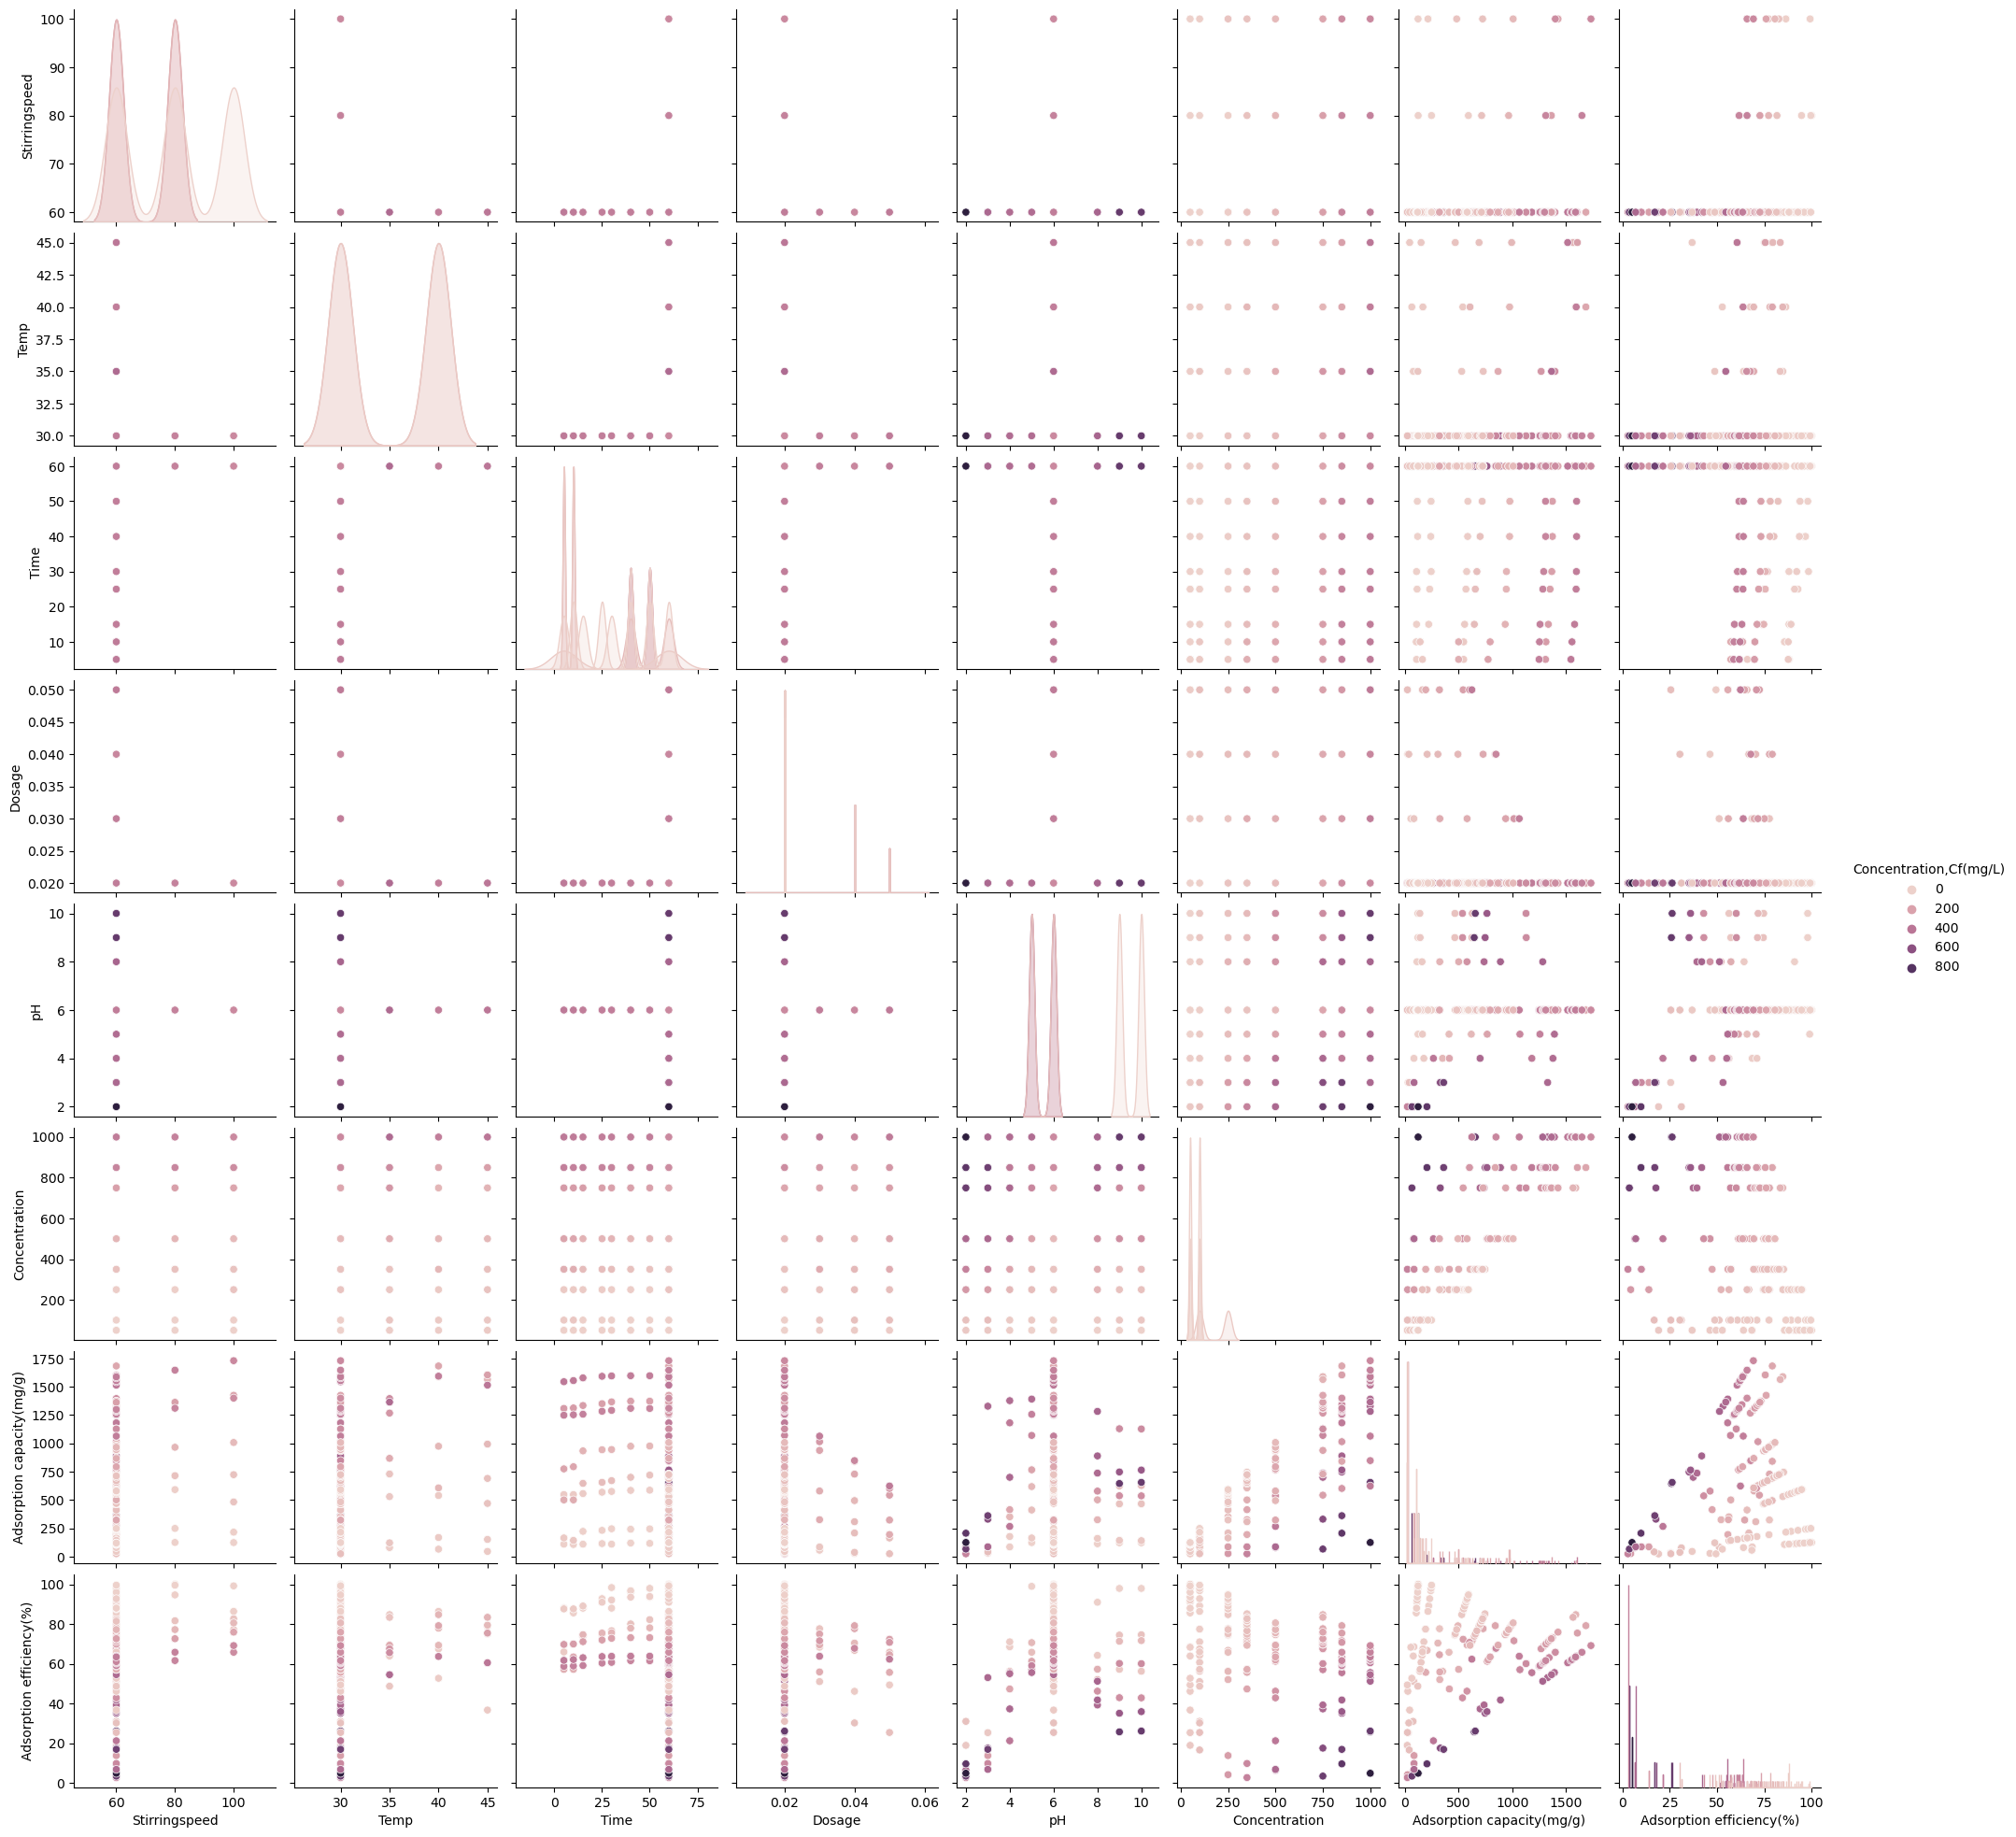

In [19]:
import seaborn as sns

sns.pairplot(data, diag_kind='kde', hue='Concentration,Cf(mg/L)')  # 'kde' adds kernel density plots on the diagonal
plt.show()

# Create scatterplots for Output1 vs. each input variable
for col in ['Stirringspeed', 'Temp', 'Time', 'Dosage', 'pH', 'Concentration']:
    sns.scatterplot(x=col, y='Concentration,Cf(mg/L)', data=data)
    plt.show()

In [20]:
#summary statistics of data
data = pd.read_excel("Data.xlsx", skiprows=1)
print(data.describe())

       Stirringspeed          Temp          Time        Dosage            pH  \
count   98112.000000  98112.000000  98112.000000  98112.000000  98112.000000   
mean       62.500000     31.250000     49.791667      0.022500      5.958333   
std         8.779756      3.608458     17.881597      0.007217      1.567362   
min        60.000000     30.000000      5.000000      0.020000      2.000000   
25%        60.000000     30.000000     47.500000      0.020000      6.000000   
50%        60.000000     30.000000     60.000000      0.020000      6.000000   
75%        60.000000     30.000000     60.000000      0.020000      6.000000   
max       100.000000     45.000000     60.000000      0.050000     10.000000   

       Concentration  Concentration,Cf(mg/L)  Adsorption capacity(mg/g)  \
count   98112.000000            98112.000000               98112.000000   
mean      481.250000              187.091458                 686.191111   
std       331.605275              181.816930          

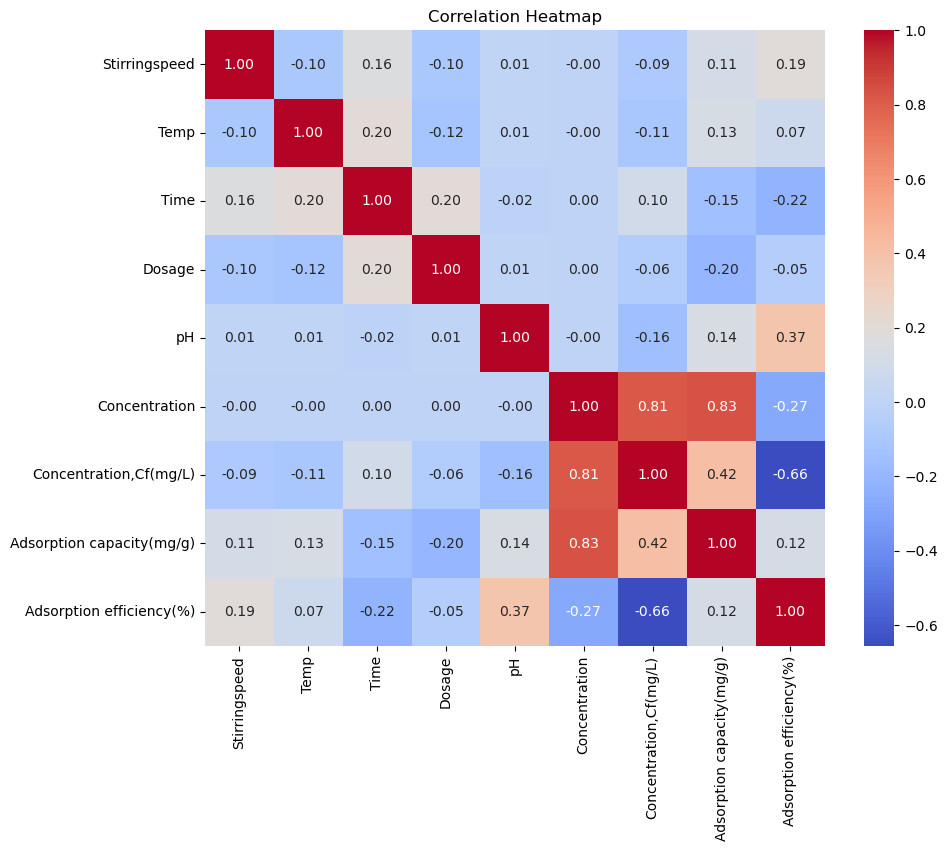

In [11]:
#correlation matrix heat map
data = pd.read_excel("Data.xlsx", skiprows=1)
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

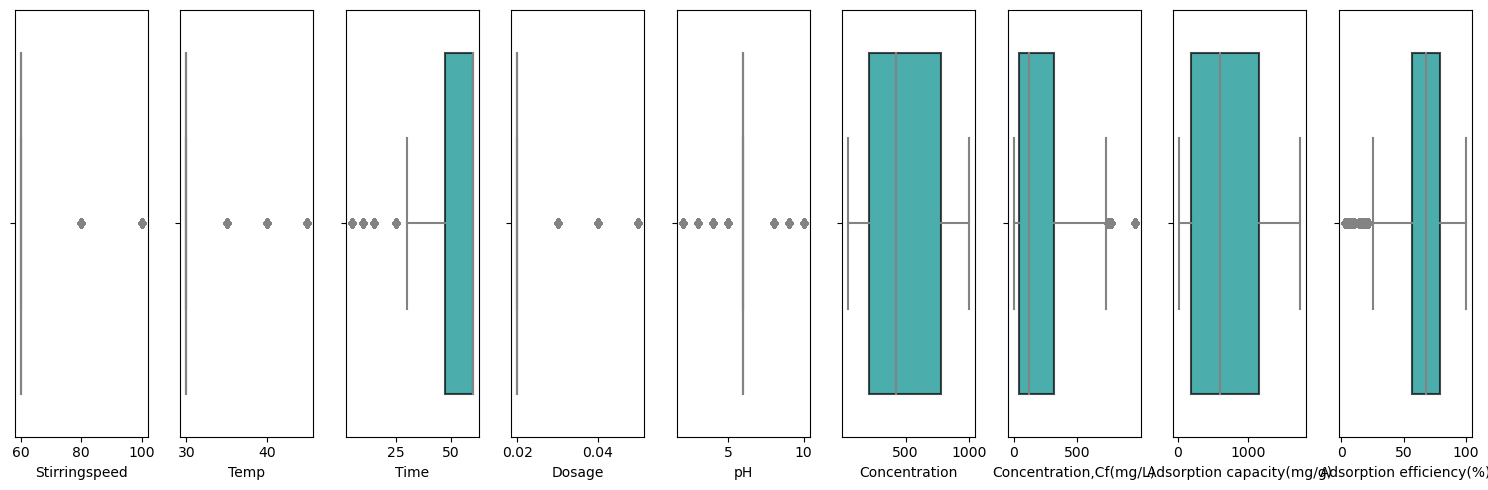

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel("Data.xlsx", skiprows=1)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=data.shape[1], figsize=(15, 5))

# Plot box plots with light pink fill color
for i, col in enumerate(data.columns):
    sns.boxplot(x=data[col], ax=axes[i], orient="h", color='lightpink', boxprops=dict(facecolor='darkcyan', edgecolor='black', alpha=0.7))

# Set titles and labels
for i, col in enumerate(data.columns):
      axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
import matplotlib.pyplot as plt
data = pd.read_excel("Data.xlsx", skiprows=1)
X = data.drop(columns=['Stirringspeed', 'Temp', 'Time', 'Dosage', 'pH', 'Concentration'], axis =1)
y = data[['Concentration,Cf(mg/L)', 'Adsorption capacity(mg/g)', 'Adsorption efficiency(%)']]
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
model = MLPRegressor(hidden_layer_sizes=(20, 20), activation='relu', solver='adam', max_iter=200, tol=1e-4, validation_fraction=0.15)
model.fit(X_train, y_train)
y_train = model.predict(X_train)
y_pred = model.predict(X_test)

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2:", r2_score(y_test, y_pred, sample_weight=None, force_finite=True))

Mean Squared Error: 0.014239775612366112
R2: 0.9999890284741987


In [8]:
num_data_points_to_print = min(200, len(y_test))  # upto 200 data points 

output_df = pd.DataFrame({'Actual_Concentration,Cf(mg/L)': y_test.iloc[:num_data_points_to_print, 0].values,
                          'Predicted_Concentration,Cf(mg/L)': y_pred[:num_data_points_to_print, 0],
                          'Actual_Adsorption capacity(mg/g)': y_test.iloc[:num_data_points_to_print, 1].values,
                          'Predicted_Adsorption capacity(mg/g)': y_pred[:num_data_points_to_print, 1],
                          'Actual_Adsorption efficiency(%)': y_test.iloc[:num_data_points_to_print, 2].values,
                          'Predicted_Adsorption efficiency(%)': y_pred[:num_data_points_to_print, 2]})
output_df

,"Actual_Concentration,Cf(mg/L)","Predicted_Concentration,Cf(mg/L)",Actual_Adsorption capacity(mg/g),Predicted_Adsorption capacity(mg/g),Actual_Adsorption efficiency(%),Predicted_Adsorption efficiency(%)
0,469.68,469.632143,700.8,700.731004,37.376000,37.501769
1,1.00,1.060019,122.5,122.628303,98.000000,98.028314
2,340.08,340.087470,24.8,24.946430,2.834286,3.109184
3,68.88,69.116184,77.8,77.826862,31.120000,31.201873
4,737.68,737.956691,655.8,655.616312,26.232000,26.307504
...,...,...,...,...,...,...
195,119.68,119.765285,325.8,325.777065,52.128000,52.193525
196,15.96,15.870688,585.1,585.019968,93.616000,93.626514
197,4.48,4.334003,113.8,113.714089,91.040000,91.148058
198,39.20,39.292668,152.0,151.981386,60.800000,60.839209


ANN model prediction


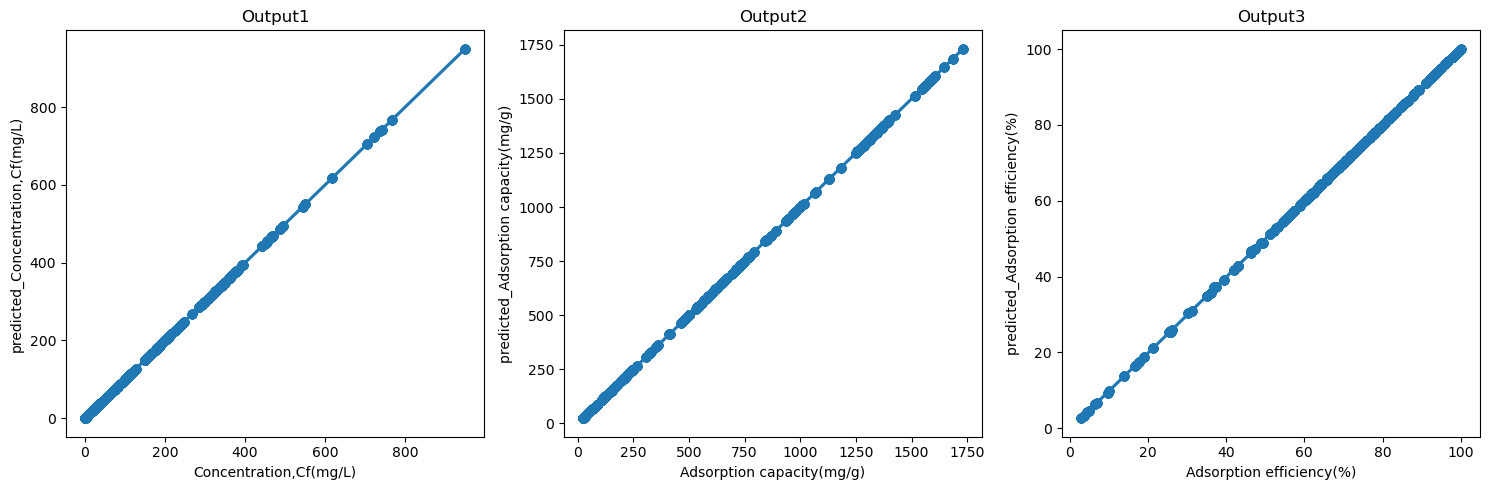

In [32]:
import seaborn as sns
df = pd.read_excel("predicted_data_with_inputs.xlsx")

# Create subplots in one line
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for 3 plots


sns.regplot(x='Concentration,Cf(mg/L)', y='predicted_Concentration,Cf(mg/L)', data=df, ax=axes[0])
axes[0].set_title('Output1')

sns.regplot(x='Adsorption capacity(mg/g)', y='predicted_Adsorption capacity(mg/g)', data=df, ax=axes[1])
axes[1].set_title('Output2')

sns.regplot(x='Adsorption efficiency(%)', y='predicted_Adsorption efficiency(%)', data=df, ax=axes[2])
axes[2].set_title('Output3')

print('ANN model prediction')
plt.tight_layout()

plt.show()

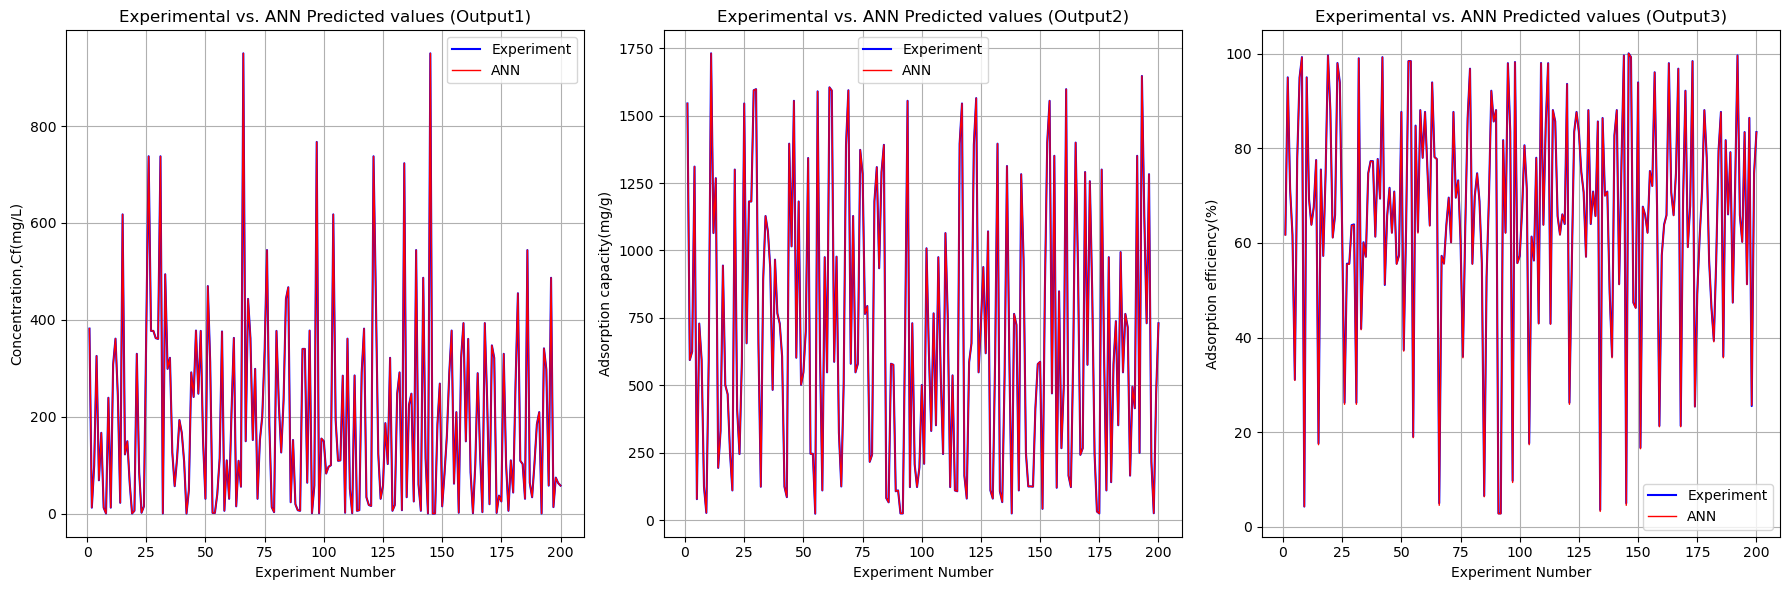

In [36]:
df = pd.read_excel('predicted_data_with_inputs.xlsx')
# experiment numbers, Output1 values, and predicted Output1 values
experiment_numbers = df['Experiment'][:200]
output1_values = df['Concentration,Cf(mg/L)'][:200]
predicted_output1_values = df['predicted_Concentration,Cf(mg/L)'][:200]


fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for 3 plots

# Plot 1: Concentration,Cf(mg/L)
axes[0].plot(experiment_numbers, output1_values, label='Experiment', linestyle='-', color='blue')
axes[0].plot(experiment_numbers, predicted_output1_values, label='ANN', linestyle='-', color='red', linewidth=1)
axes[0].set_xlabel('Experiment Number')
axes[0].set_ylabel('Concentration,Cf(mg/L)')
axes[0].set_title('Experimental vs. ANN Predicted values (Output1)')
axes[0].legend()
axes[0].grid()

# experiment numbers, Output2 values, and predicted Output2 values
experiment_numbers = df['Experiment'][:200]
output2_values = df['Adsorption capacity(mg/g)'][:200]
predicted_output2_values = df['predicted_Adsorption capacity(mg/g)'][:200]

# Plot 2: Adsorption capacity(mg/g)
axes[1].plot(experiment_numbers, output2_values, label='Experiment', linestyle='-', color='blue')
axes[1].plot(experiment_numbers, predicted_output2_values, label='ANN', linestyle='-', color='red', linewidth=1)
axes[1].set_xlabel('Experiment Number')
axes[1].set_ylabel('Adsorption capacity(mg/g)')
axes[1].set_title('Experimental vs. ANN Predicted values (Output2)')
axes[1].legend()
axes[1].grid()

# experiment numbers, Output3 values, and predicted Output3 values
experiment_numbers = df['Experiment'][:200]
output3_values = df['Adsorption efficiency(%)'][:200]
predicted_output3_values = df['predicted_Adsorption efficiency(%)'][:200]

# Plot 3: Adsorption efficiency(%)
axes[2].plot(experiment_numbers, output3_values, label='Experiment', linestyle='-', color='blue')
axes[2].plot(experiment_numbers, predicted_output3_values, label='ANN', linestyle='-', color='red', linewidth=1)
axes[2].set_xlabel('Experiment Number')
axes[2].set_ylabel('Adsorption efficiency(%)')
axes[2].set_title('Experimental vs. ANN Predicted values (Output3)')
axes[2].legend()
axes[2].grid()


plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_excel("Data.xlsx", skiprows=1)
X = data.drop(columns=['Stirringspeed', 'Temp', 'Time', 'Dosage', 'pH', 'Concentration'], axis =1)
y = data[['Concentration,Cf(mg/L)', 'Adsorption capacity(mg/g)', 'Adsorption efficiency(%)']]
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
model = RandomForestRegressor(n_estimators=200, max_features=6,bootstrap=True, max_depth=None, oob_score=True, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2:", r2_score(y_test, y_pred, sample_weight=None, force_finite=True))

Mean Squared Error: 2.9682912985873407e-24
R2: 1.0


In [2]:
num_data_points_to_print = min(200, len(y_test))  # upto 200 data points 

output_df = pd.DataFrame({'Actual_Concentration,Cf(mg/L)': y_test.iloc[:num_data_points_to_print, 0].values,
                          'Predicted_Concentration,Cf(mg/L)': y_pred[:num_data_points_to_print, 0],
                          'Actual_Adsorption capacity(mg/g)': y_test.iloc[:num_data_points_to_print, 1].values,
                          'Predicted_Adsorption capacity(mg/g)': y_pred[:num_data_points_to_print, 1],
                          'Actual_Adsorption efficiency(%)': y_test.iloc[:num_data_points_to_print, 2].values,
                          'Predicted_Adsorption efficiency(%)': y_pred[:num_data_points_to_print, 2]})
output_df

,"Actual_Concentration,Cf(mg/L)","Predicted_Concentration,Cf(mg/L)",Actual_Adsorption capacity(mg/g),Predicted_Adsorption capacity(mg/g),Actual_Adsorption efficiency(%),Predicted_Adsorption efficiency(%)
0,465.28,465.28,86.8,86.8,6.944000,6.944000
1,381.96,381.96,1545.1,1545.1,61.804000,61.804000
2,285.28,285.28,536.8,536.8,42.944000,42.944000
3,113.56,113.56,966.1,966.1,77.288000,77.288000
4,326.36,326.36,1309.1,1309.1,61.604706,61.604706
...,...,...,...,...,...,...
195,617.68,617.68,330.8,330.8,17.642667,17.642667
196,182.36,182.36,794.1,794.1,63.528000,63.528000
197,346.76,346.76,1258.1,1258.1,59.204706,59.204706
198,166.88,166.88,728.9,728.9,77.749333,77.749333


RF model prediction


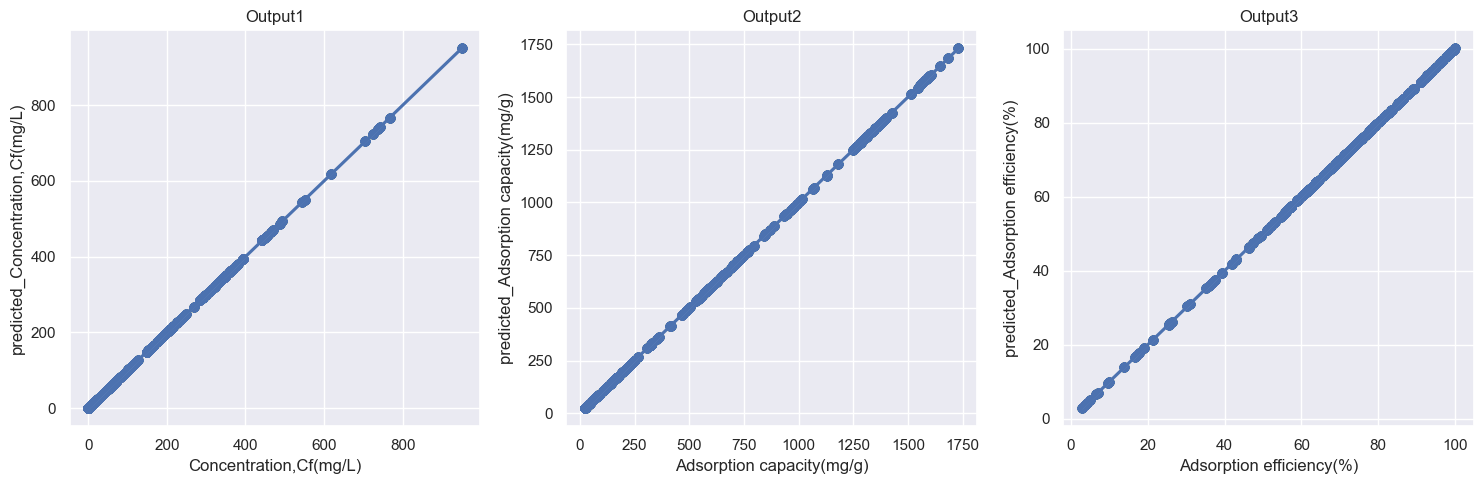

In [41]:
sns.set_theme(style='darkgrid')
df = pd.read_excel('predicted_data_with_inputs_RF.xlsx')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for 3 plots

# Regression plot for Output1, output 2, and output 3
sns.regplot(x='Concentration,Cf(mg/L)', y='predicted_Concentration,Cf(mg/L)', data=df, ax=axes[0])
axes[0].set_title('Output1')
sns.regplot(x='Adsorption capacity(mg/g)', y='predicted_Adsorption capacity(mg/g)', data=df, ax=axes[1])
axes[1].set_title('Output2')

sns.regplot(x='Adsorption efficiency(%)', y='predicted_Adsorption efficiency(%)', data=df, ax=axes[2])
axes[2].set_title('Output3')

print('RF model prediction')
plt.tight_layout()
plt.show()

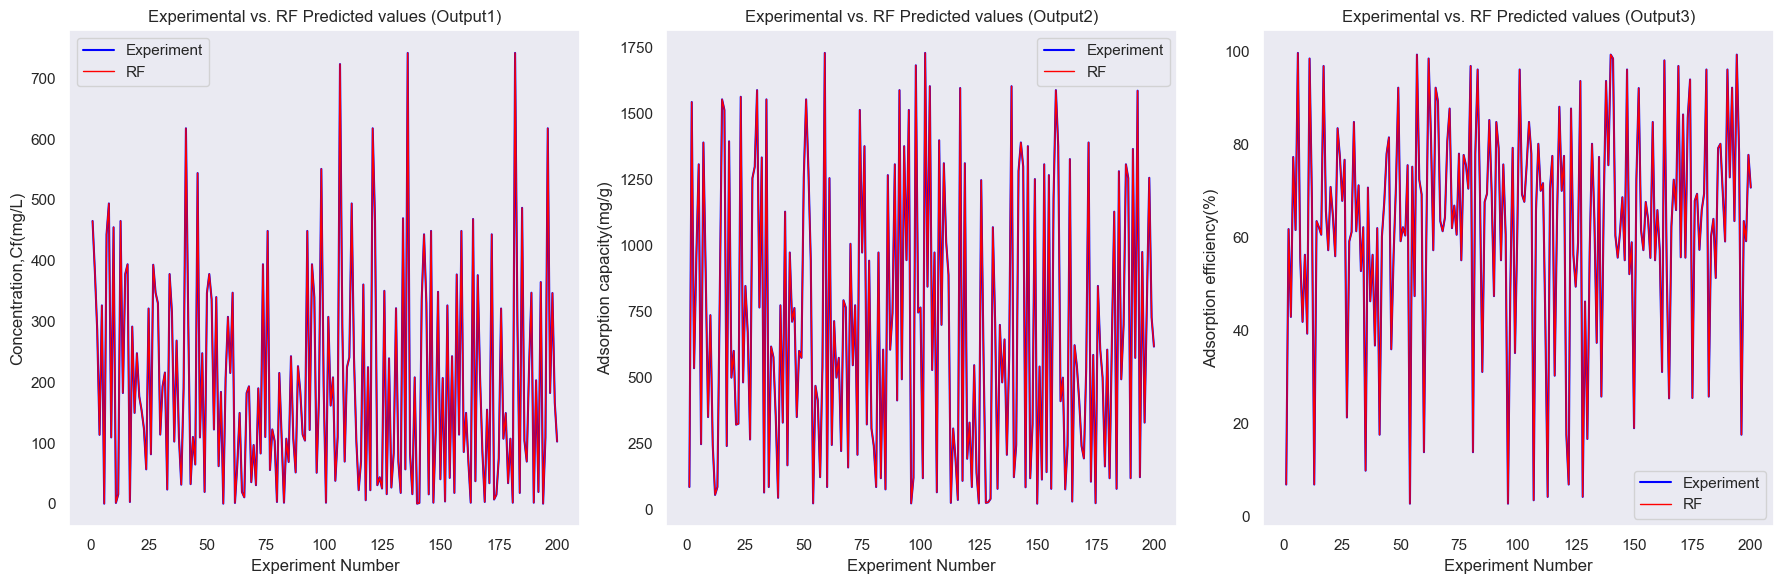

In [44]:
df = pd.read_excel('predicted_data_with_inputs_RF.xlsx')
# experiment numbers, Output1 values, and predicted Output1 values
experiment_numbers = df['Experiment'][:200]
output1_values = df['Concentration,Cf(mg/L)'][:200]
predicted_output1_values = df['predicted_Concentration,Cf(mg/L)'][:200]


fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for 3 plots

# Plot 1: Concentration,Cf(mg/L)
axes[0].plot(experiment_numbers, output1_values, label='Experiment', linestyle='-', color='blue')
axes[0].plot(experiment_numbers, predicted_output1_values, label='RF', linestyle='-', color='red', linewidth=1)
axes[0].set_xlabel('Experiment Number')
axes[0].set_ylabel('Concentration,Cf(mg/L)')
axes[0].set_title('Experimental vs. RF Predicted values (Output1)')
axes[0].legend()
axes[0].grid()

# experiment numbers, Output2 values, and predicted Output2 values
experiment_numbers = df['Experiment'][:200]
output2_values = df['Adsorption capacity(mg/g)'][:200]
predicted_output2_values = df['predicted_Adsorption capacity(mg/g)'][:200]

# Plot 2: Adsorption capacity(mg/g)
axes[1].plot(experiment_numbers, output2_values, label='Experiment', linestyle='-', color='blue')
axes[1].plot(experiment_numbers, predicted_output2_values, label='RF', linestyle='-', color='red', linewidth=1)
axes[1].set_xlabel('Experiment Number')
axes[1].set_ylabel('Adsorption capacity(mg/g)')
axes[1].set_title('Experimental vs. RF Predicted values (Output2)')
axes[1].legend()
axes[1].grid()

# experiment numbers, Output3 values, and predicted Output3 values
experiment_numbers = df['Experiment'][:200]
output3_values = df['Adsorption efficiency(%)'][:200]
predicted_output3_values = df['predicted_Adsorption efficiency(%)'][:200]

# Plot 3: Adsorption efficiency(%)
axes[2].plot(experiment_numbers, output3_values, label='Experiment', linestyle='-', color='blue')
axes[2].plot(experiment_numbers, predicted_output3_values, label='RF', linestyle='-', color='red', linewidth=1)
axes[2].set_xlabel('Experiment Number')
axes[2].set_ylabel('Adsorption efficiency(%)')
axes[2].set_title('Experimental vs. RF Predicted values (Output3)')
axes[2].legend()
axes[2].grid()


plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
data = pd.read_excel("Data.xlsx", skiprows=1)

# Split data into inputs (X) and outputs (y)
X = data.drop(columns=['Stirringspeed', 'Temp', 'Time', 'Dosage', 'pH', 'Concentration'], axis=1)
y = data[['Concentration,Cf(mg/L)', 'Adsorption capacity(mg/g)', 'Adsorption efficiency(%)']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Create the Gradient Boosting Regressor model
# You can adjust hyperparameters like n_estimators, learning_rate, max_depth, etc.
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error for each output
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error for Output 1:", mse[0])
print("Mean Squared Error for Output 2:", mse[1])
print("Mean Squared Error for Output 3:", mse[2])

# Calculate R2 Score for each output
r2 = r2_score(y_test, y_pred, multioutput='raw_values')
print("R2 Score for Output 1:", r2[0])
print("R2 Score for Output 2:", r2[1])
print("R2 Score for Output 3:", r2[2])